# Gather the data

In [1]:
# importing the necessary libraries

import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from folium.plugins import FastMarkerCluster
import json
import requests

In [2]:
# importing the full dataset from airbnb
data_full = pd.read_csv('Data_sets/listings_v1.csv')

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# importing a subset of the full dataset from airbnb
# for this anaylsis, we are going to use this dataset

data = pd.read_csv('Data_sets/listings_summary.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,277,2019-11-21,2.13,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,306,2019-12-05,2.57,2,198
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.13,2,71
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,206,2019-11-11,2.14,1,251
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,318,2019-11-23,2.81,3,134


In [4]:
# checking the shape of the dataframe

data.shape

(20025, 16)

In [5]:
# printing the columns of the dataframe

print(list(data.columns))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [6]:
# checking information about the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20025 entries, 0 to 20024
Data columns (total 16 columns):
id                                20025 non-null int64
name                              19991 non-null object
host_id                           20025 non-null int64
host_name                         19867 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     20025 non-null object
latitude                          20025 non-null float64
longitude                         20025 non-null float64
room_type                         20025 non-null object
price                             20025 non-null int64
minimum_nights                    20025 non-null int64
number_of_reviews                 20025 non-null int64
last_review                       17621 non-null object
reviews_per_month                 17621 non-null float64
calculated_host_listings_count    20025 non-null int64
availability_365                  20025 non-null int64
dt

# Data Cleaning

In [7]:
# creating a new dataframe with the relevant columns

data2 = data[['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price']]

In [8]:
column_accommodates = data_full[['id','accommodates']]

data3 = pd.merge(data2, column_accommodates, on = 'id')

In [9]:
# checking missing values

null_cols = data3.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [10]:
# checking the number of duplicates

before = len(data3)
data3 = data3.drop_duplicates()
after = len(data3)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [11]:
# changing the column name of price to price_USD
data3 = data3.rename(columns = {'price': 'price_USD'})


# adding two new columns: price in euros and price in euros per number of accommodates
Exchange_rate_USD_Eu = 0.895667
data3['price_€'] = data3['price_USD']*Exchange_rate_USD_Eu
data3['price_€_accommodates'] = data3['price_€']/data3['accommodates']

data3

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
0,2818,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,2,52.844353,26.422176
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
2,25428,Centrum-West,52.37297,4.88339,Entire home/apt,125,3,111.958375,37.319458
3,27886,Centrum-West,52.38673,4.89208,Private room,155,2,138.828385,69.414192
4,28871,Centrum-West,52.36719,4.89092,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...
20020,40649791,Watergraafsmeer,52.35696,4.94521,Entire home/apt,137,3,122.706379,40.902126
20021,40649918,Geuzenveld - Slotermeer,52.37556,4.81353,Entire home/apt,135,4,120.915045,30.228761
20022,40650044,Centrum-West,52.37355,4.89435,Private room,60,2,53.740020,26.870010
20023,40653547,Gaasperdam - Driemond,52.29548,4.97723,Entire home/apt,95,5,85.088365,17.017673


In [12]:
# checking the data types of each collumn
data3.dtypes

id                        int64
neighbourhood            object
latitude                float64
longitude               float64
room_type                object
price_USD                 int64
accommodates              int64
price_€                 float64
price_€_accommodates    float64
dtype: object

In [13]:
# checking for low variance columns

low_variance = []

for col in data3._get_numeric_data():
    minimum = min(data3[col])
    ninety_perc = np.percentile(data3[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

[]


In [14]:
# checking the minimum and maximum price

print("Max price is: ", data3['price_€'].max())
print("Min price is: ", data3['price_€'].min())

Max price is:  8061.003
Min price is:  0.0


In [15]:
# removing the values in which price equals to zero
data3 = data3[data3['price_USD'] != 0]
data3

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
0,2818,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,2,52.844353,26.422176
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
2,25428,Centrum-West,52.37297,4.88339,Entire home/apt,125,3,111.958375,37.319458
3,27886,Centrum-West,52.38673,4.89208,Private room,155,2,138.828385,69.414192
4,28871,Centrum-West,52.36719,4.89092,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...
20020,40649791,Watergraafsmeer,52.35696,4.94521,Entire home/apt,137,3,122.706379,40.902126
20021,40649918,Geuzenveld - Slotermeer,52.37556,4.81353,Entire home/apt,135,4,120.915045,30.228761
20022,40650044,Centrum-West,52.37355,4.89435,Private room,60,2,53.740020,26.870010
20023,40653547,Gaasperdam - Driemond,52.29548,4.97723,Entire home/apt,95,5,85.088365,17.017673


In [16]:
# checking for the statistics module values

stats = data3.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,20024.0,1.911695e+07,1.147330e+07,2818.000000,9.631274e+06,1.841851e+07,2.791354e+07,4.065521e+07,1.828226e+07
latitude,20024.0,5.236533e+01,1.644860e-02,52.289270,5.235511e+01,5.236464e+01,5.237526e+01,5.242841e+01,2.015000e-02
longitude,20024.0,4.889477e+00,3.621271e-02,4.753560,4.863620e+00,4.887055e+00,4.909330e+00,5.027690e+00,4.571000e-02
price_USD,20024.0,1.632598e+02,1.985398e+02,5.000000,9.900000e+01,1.300000e+02,1.850000e+02,9.000000e+03,8.600000e+01
accommodates,20024.0,2.868608e+00,1.304534e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.800000e+01,2.000000e+00
price_€,20024.0,1.462264e+02,1.778255e+02,4.478335,8.867103e+01,1.164367e+02,1.656984e+02,8.061003e+03,7.702736e+01
price_€_accommodates,20024.0,5.320559e+01,6.537761e+01,1.119584,3.537885e+01,4.478335e+01,6.157711e+01,4.030501e+03,2.619826e+01


In [18]:
# checking for outliers

outliers = pd.DataFrame(columns=data3.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data3[(data3[col] < lower) | 
                   (data3[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

list_outliers= outliers['Outlier'].tolist()
list(set(outliers))

['price_USD',
 'accommodates',
 'price_€',
 'price_€_accommodates',
 'room_type',
 'Outlier',
 'latitude',
 'id',
 'longitude',
 'neighbourhood']

In [19]:
outliers

,Outlier,accommodates,id,latitude,longitude,neighbourhood,price_USD,price_€,price_€_accommodates,room_type
2781,latitude,3,5475024,52.29069,4.98378,Gaasperdam - Driemond,40,35.826680,11.942227,Private room
2789,latitude,4,5503580,52.28927,4.97376,Gaasperdam - Driemond,170,152.263390,38.065847,Entire home/apt
3266,latitude,2,6419068,52.29178,4.96722,Gaasperdam - Driemond,109,97.627703,48.813851,Private room
6401,latitude,4,12756139,52.29221,4.98996,Gaasperdam - Driemond,101,90.462367,22.615592,Entire home/apt
6597,latitude,2,13061174,52.29289,4.97291,Gaasperdam - Driemond,100,89.566700,44.783350,Private room
...,...,...,...,...,...,...,...,...,...,...
19851,price_€_accommodates,4,40461558,52.36776,4.94560,Oostelijk Havengebied - Indische Buurt,818,732.655606,183.163902,Entire home/apt
19852,price_€_accommodates,4,40461636,52.36797,4.94536,Oostelijk Havengebied - Indische Buurt,818,732.655606,183.163902,Entire home/apt
19853,price_€_accommodates,2,40461718,52.36808,4.94680,Oostelijk Havengebied - Indische Buurt,818,732.655606,366.327803,Private room
19977,price_€_accommodates,2,40606689,52.38752,4.83834,Geuzenveld - Slotermeer,500,447.833500,223.916750,Entire home/apt


In [20]:
#Filtering Records on collumn price

filtered_price = outliers[(outliers['Outlier']=='price_€')]
filtered_price

,Outlier,accommodates,id,latitude,longitude,neighbourhood,price_USD,price_€,price_€_accommodates,room_type
31,price_€,4,62801,52.38459,4.85463,Bos en Lommer,750,671.75025,167.937562,Entire home/apt
34,price_€,4,64769,52.36225,4.90200,Centrum-Oost,450,403.05015,100.762537,Entire home/apt
107,price_€,4,258273,52.35420,4.89160,De Pijp - Rivierenbuurt,8000,7165.33600,1791.334000,Entire home/apt
116,price_€,12,283170,52.35353,4.87514,Zuid,650,582.18355,48.515296,Entire home/apt
120,price_€,2,286500,52.37497,4.89884,Centrum-West,9000,8061.00300,4030.501500,Private room
...,...,...,...,...,...,...,...,...,...,...
19903,price_€,6,40522119,52.37552,4.88656,Centrum-West,450,403.05015,67.175025,Entire home/apt
19918,price_€,6,40532805,52.32080,4.85962,Buitenveldert - Zuidas,600,537.40020,89.566700,Entire home/apt
19945,price_€,6,40564848,52.37465,4.89273,Centrum-West,750,671.75025,111.958375,Entire home/apt
19973,price_€,4,40606541,52.38758,4.83844,Geuzenveld - Slotermeer,500,447.83350,111.958375,Entire home/apt


In [21]:
# we are going to drop the collumns with price less than 30€/night and above 900€/night

data4 = data3[(data3['price_€'] >= 30) & (data3['price_€'] <900)]

data_final = data4
data_final

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
0,2818,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,2,52.844353,26.422176
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
2,25428,Centrum-West,52.37297,4.88339,Entire home/apt,125,3,111.958375,37.319458
3,27886,Centrum-West,52.38673,4.89208,Private room,155,2,138.828385,69.414192
4,28871,Centrum-West,52.36719,4.89092,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...
20020,40649791,Watergraafsmeer,52.35696,4.94521,Entire home/apt,137,3,122.706379,40.902126
20021,40649918,Geuzenveld - Slotermeer,52.37556,4.81353,Entire home/apt,135,4,120.915045,30.228761
20022,40650044,Centrum-West,52.37355,4.89435,Private room,60,2,53.740020,26.870010
20023,40653547,Gaasperdam - Driemond,52.29548,4.97723,Entire home/apt,95,5,85.088365,17.017673


# Data analysis

In [22]:
# checking for the statistics module values

stats = data_final.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,19903.0,1.909022e+07,1.146308e+07,2818.000000,9.618686e+06,1.840098e+07,2.785674e+07,4.065521e+07,1.823805e+07
latitude,19903.0,5.236533e+01,1.641390e-02,52.289270,5.235513e+01,5.236463e+01,5.237525e+01,5.242841e+01,2.012000e-02
longitude,19903.0,4.889483e+00,3.610913e-02,4.753560,4.863635e+00,4.887040e+00,4.909335e+00,5.027690e+00,4.570000e-02
price_USD,19903.0,1.577183e+02,1.002305e+02,34.000000,9.900000e+01,1.300000e+02,1.850000e+02,1.000000e+03,8.600000e+01
accommodates,19903.0,2.865498e+00,1.284340e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.700000e+01,2.000000e+00
price_€,19903.0,1.412631e+02,8.977319e+01,30.452678,8.867103e+01,1.164367e+02,1.656984e+02,8.956670e+02,7.702736e+01
price_€_accommodates,19903.0,5.179993e+01,3.222327e+01,4.478335,3.537885e+01,4.478335e+01,6.157711e+01,8.956670e+02,2.619826e+01


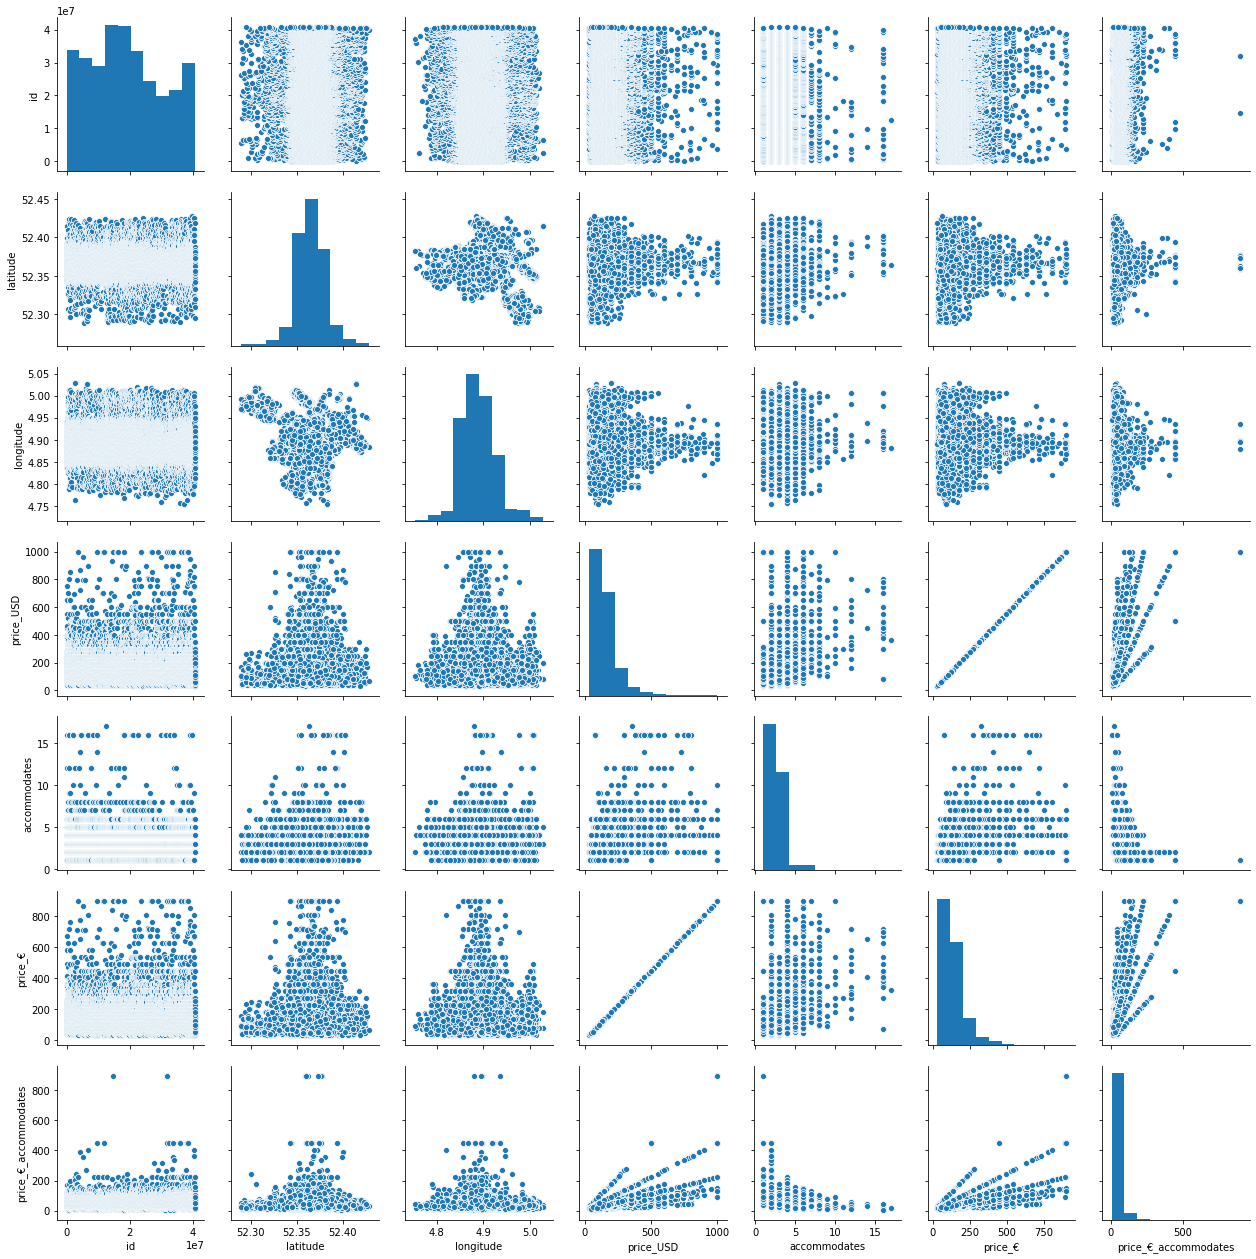

In [27]:
sns.pairplot(data_final)

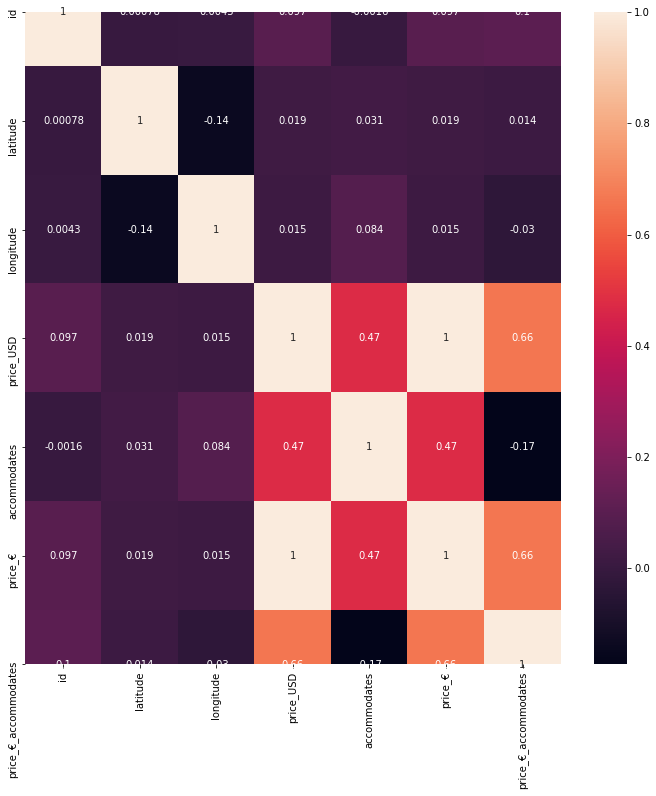

In [28]:
plt.figure(figsize=(12,12))

sns.heatmap(data_final.corr(), annot=True)

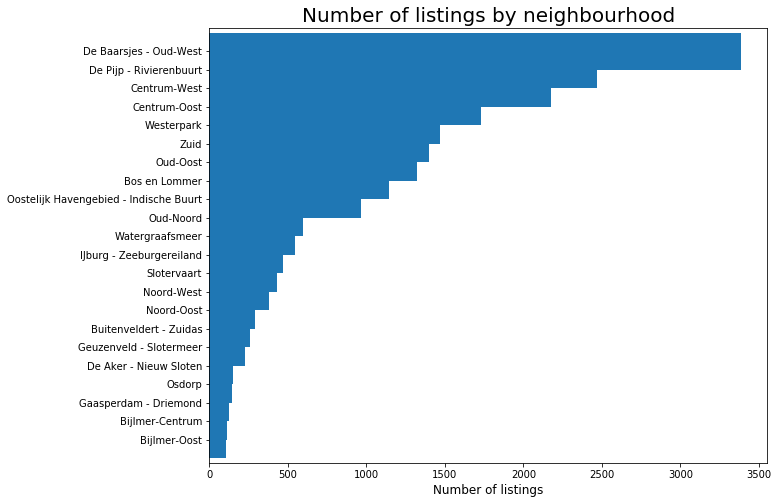

Bijlmer-Oost                               105
Bijlmer-Centrum                            112
Gaasperdam - Driemond                      129
Osdorp                                     142
De Aker - Nieuw Sloten                     154
Geuzenveld - Slotermeer                    231
Buitenveldert - Zuidas                     258
Noord-Oost                                 291
Noord-West                                 382
Slotervaart                                431
IJburg - Zeeburgereiland                   467
Watergraafsmeer                            549
Oud-Noord                                  595
Oostelijk Havengebied - Indische Buurt     968
Bos en Lommer                             1143
Oud-Oost                                  1321
Zuid                                      1397
Westerpark                                1467
Centrum-Oost                              1732
Centrum-West                              2176
De Pijp - Rivierenbuurt                   2470
De Baarsjes -

In [23]:
# checking the Number of listings by neighbourhood

feq=data_final['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), width=2)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)

plt.show()
print(feq)

In [30]:
# mapping all the listings
# we used in the code the coordinates of central Amsterdam which we found on this website: https://www.latlong.net/place/amsterdam-centraal-the-netherlands-358.html

latitude = data_final['latitude'].tolist()
longitude = data_final['longitude'].tolist()
locations = list(zip(latitude, longitude))

map1 = folium.Map(location=[52.379189, 4.899431], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

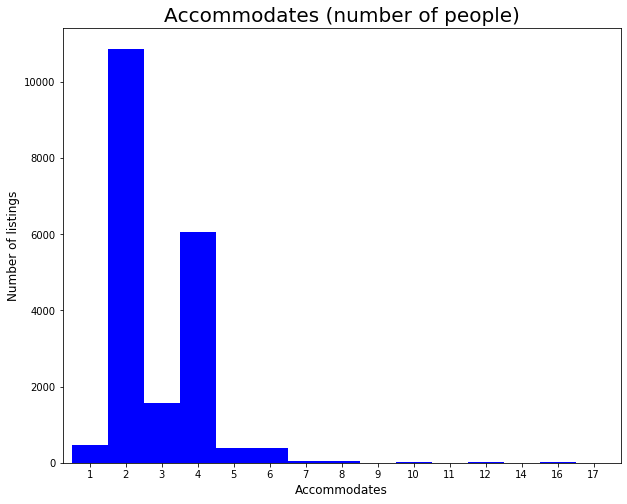

In [31]:
# analysing the distribution number of accommodates

feq=data_final['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

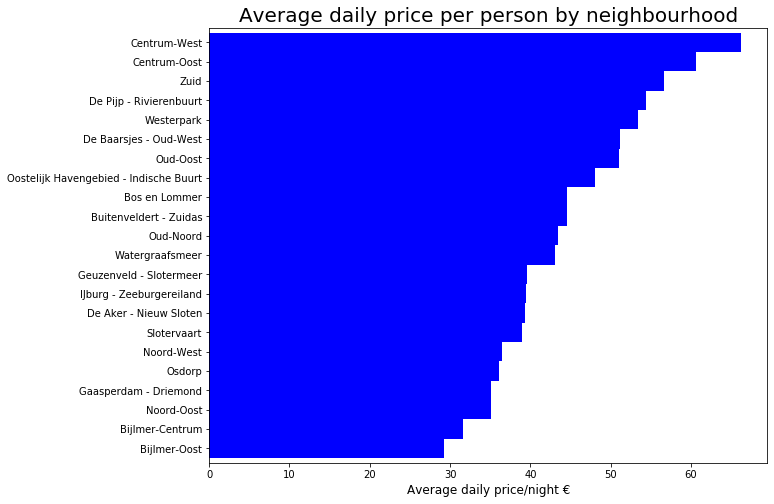

neighbourhood
Bijlmer-Oost                              29.257440
Bijlmer-Centrum                           31.592254
Noord-Oost                                35.051351
Gaasperdam - Driemond                     35.105005
Osdorp                                    36.080295
Noord-West                                36.486539
Slotervaart                               38.903258
De Aker - Nieuw Sloten                    39.381362
IJburg - Zeeburgereiland                  39.468309
Geuzenveld - Slotermeer                   39.542784
Watergraafsmeer                           43.064476
Oud-Noord                                 43.415282
Buitenveldert - Zuidas                    44.591102
Bos en Lommer                             44.615941
Oostelijk Havengebied - Indische Buurt    48.073075
Oud-Oost                                  51.095604
De Baarsjes - Oud-West                    51.182652
Westerpark                                53.385872
De Pijp - Rivierenbuurt                   54.40604

In [22]:
# analysing the distribution of price by neighbourhood

feq = data_final
feq = feq.groupby('neighbourhood')['price_€_accommodates'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price per person by neighbourhood", fontsize=20)
plt.xlabel('Average daily price/night €', fontsize=12)
plt.ylabel("")
plt.show()
print(feq)

In [24]:
data_final[['neighbourhood', 'latitude', 'longitude']]

,neighbourhood,latitude,longitude
0,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142
1,Centrum-Oost,52.36509,4.89354
2,Centrum-West,52.37297,4.88339
3,Centrum-West,52.38673,4.89208
4,Centrum-West,52.36719,4.89092
...,...,...,...
20020,Watergraafsmeer,52.35696,4.94521
20021,Geuzenveld - Slotermeer,52.37556,4.81353
20022,Centrum-West,52.37355,4.89435
20023,Gaasperdam - Driemond,52.29548,4.97723


In [25]:
# we took the mean of latitude and longitude of each neighbourhood to estimate the central point 
data_final.groupby(['neighbourhood'])['latitude', 'longitude'].mean()

,latitude,longitude
neighbourhood,,
Bijlmer-Centrum,52.318648,4.949961
Bijlmer-Oost,52.320118,4.975185
Bos en Lommer,52.378617,4.852079
Buitenveldert - Zuidas,52.330383,4.872296
Centrum-Oost,52.366022,4.903719
Centrum-West,52.375573,4.887118
De Aker - Nieuw Sloten,52.345900,4.799592
De Baarsjes - Oud-West,52.366228,4.862487
De Pijp - Rivierenbuurt,52.351131,4.897632


# Deep dive neighbourhood: Centrum_Oost

In [23]:
Centrum_Oost = data_final[(data_final['neighbourhood']=='Centrum-Oost')]
Centrum_Oost

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680
23,55256,Centrum-Oost,52.37126,4.90351,Private room,86,2,77.027362,38.513681
32,63872,Centrum-Oost,52.37117,4.90948,Entire home/apt,170,2,152.263390,76.131695
34,64769,Centrum-Oost,52.36225,4.90200,Entire home/apt,450,4,403.050150,100.762537
49,96048,Centrum-Oost,52.37270,4.90776,Private room,75,2,67.175025,33.587513
...,...,...,...,...,...,...,...,...,...
20006,40632416,Centrum-Oost,52.37489,4.90416,Private room,180,2,161.220060,80.610030
20008,40632707,Centrum-Oost,52.36488,4.89604,Entire home/apt,50,4,44.783350,11.195837
20009,40633366,Centrum-Oost,52.37446,4.90473,Private room,280,4,250.786760,62.696690
20010,40634665,Centrum-Oost,52.37328,4.91131,Entire home/apt,189,4,169.281063,42.320266


In [24]:
api_key='iU27ZPgCGfkOD416NVPFB6FRp8kq5jsQ1CiYMgwJdVdq58-0o66o1XY27MoEXWSElmO22aFtaTKpMjhcvkPN3nAQf_K56s-9xS7ZUY-piQDRGMwF5nHmJ65PBclgXnYx'
headers = {'Authorization': 'Bearer %s' % api_key}

url='https://api.yelp.com/v3/businesses/search'

def get_facilities(category):
    
    Centrum_Oost[category] = 0
    
    for i in Centrum_Oost.index:

        params = {'categories': category, 'latitude': Centrum_Oost['latitude'][i], 'longitude': Centrum_Oost['longitude'][i], 'radius': 250, 'limit': 50}
        req=requests.get(url, params=params, headers=headers)

        if format(req.status_code) != '200':
            raise ValueError("Help API response with error")

        parsed = json.loads(req.text)
        businesses = parsed["businesses"]

        total_venues = pd.DataFrame(businesses)
        Centrum_Oost[category][i] = len(total_venues) 

In [25]:
print("calculating the number of nightlife facilities")
get_facilities('nightlife')

print("calculating the restaurants of restaurants facilities")
get_facilities('restaurants')

calculating the number of nightlife facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


calculating the restaurants of restaurants facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
Centrum_Oost

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680,31,50
23,55256,Centrum-Oost,52.37126,4.90351,Private room,86,2,77.027362,38.513681,6,21
32,63872,Centrum-Oost,52.37117,4.90948,Entire home/apt,170,2,152.263390,76.131695,6,6
34,64769,Centrum-Oost,52.36225,4.90200,Entire home/apt,450,4,403.050150,100.762537,0,10
49,96048,Centrum-Oost,52.37270,4.90776,Private room,75,2,67.175025,33.587513,5,12
...,...,...,...,...,...,...,...,...,...,...,...
20006,40632416,Centrum-Oost,52.37489,4.90416,Private room,180,2,161.220060,80.610030,7,25
20008,40632707,Centrum-Oost,52.36488,4.89604,Entire home/apt,50,4,44.783350,11.195837,50,50
20009,40633366,Centrum-Oost,52.37446,4.90473,Private room,280,4,250.786760,62.696690,6,15
20010,40634665,Centrum-Oost,52.37328,4.91131,Entire home/apt,189,4,169.281063,42.320266,7,15


In [41]:
Centrum_Oost['total_facilities'] = Centrum_Oost['nightlife']+Centrum_Oost['restaurants']
Centrum_Oost

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
1,20168,Centrum-Oost,52.36509,4.89354,Private room,80,2,71.653360,35.826680,31,50,81
23,55256,Centrum-Oost,52.37126,4.90351,Private room,86,2,77.027362,38.513681,6,21,27
32,63872,Centrum-Oost,52.37117,4.90948,Entire home/apt,170,2,152.263390,76.131695,6,6,12
34,64769,Centrum-Oost,52.36225,4.90200,Entire home/apt,450,4,403.050150,100.762537,0,10,10
49,96048,Centrum-Oost,52.37270,4.90776,Private room,75,2,67.175025,33.587513,5,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...
20006,40632416,Centrum-Oost,52.37489,4.90416,Private room,180,2,161.220060,80.610030,7,25,32
20008,40632707,Centrum-Oost,52.36488,4.89604,Entire home/apt,50,4,44.783350,11.195837,50,50,100
20009,40633366,Centrum-Oost,52.37446,4.90473,Private room,280,4,250.786760,62.696690,6,15,21
20010,40634665,Centrum-Oost,52.37328,4.91131,Entire home/apt,189,4,169.281063,42.320266,7,15,22


In [43]:
# creating a new dataframe with the relevant columns

Centrum_Oost2 = Centrum_Oost[['id', 'room_type', 'price_€', 'price_€_accommodates', 'nightlife', 'restaurants', 'total_facilities']]
Centrum_Oost2

,id,room_type,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
1,20168,Private room,71.653360,35.826680,31,50,81
23,55256,Private room,77.027362,38.513681,6,21,27
32,63872,Entire home/apt,152.263390,76.131695,6,6,12
34,64769,Entire home/apt,403.050150,100.762537,0,10,10
49,96048,Private room,67.175025,33.587513,5,12,17
...,...,...,...,...,...,...,...
20006,40632416,Private room,161.220060,80.610030,7,25,32
20008,40632707,Entire home/apt,44.783350,11.195837,50,50,100
20009,40633366,Private room,250.786760,62.696690,6,15,21
20010,40634665,Entire home/apt,169.281063,42.320266,7,15,22


In [44]:
# checking for the statistics module values

stats = Centrum_Oost2.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,1732.0,1.894102e+07,1.193906e+07,20168.000000,8.739740e+06,1.838028e+07,2.886804e+07,4.063793e+07,2.012830e+07
price_€,1732.0,1.702160e+02,1.036755e+02,33.139679,1.074800e+02,1.388284e+02,2.060034e+02,8.956670e+02,9.852337e+01
price_€_accommodates,1732.0,6.068334e+01,2.972349e+01,10.748004,4.164852e+01,5.597919e+01,7.165336e+01,3.479666e+02,3.000484e+01
nightlife,1732.0,1.432621e+01,1.635773e+01,0.000000,3.000000e+00,6.000000e+00,2.200000e+01,5.000000e+01,1.900000e+01
restaurants,1732.0,2.658603e+01,1.838481e+01,1.000000,9.000000e+00,2.200000e+01,5.000000e+01,5.000000e+01,4.100000e+01
total_facilities,1732.0,4.091224e+01,3.303385e+01,1.000000,1.300000e+01,2.700000e+01,7.000000e+01,1.000000e+02,5.700000e+01


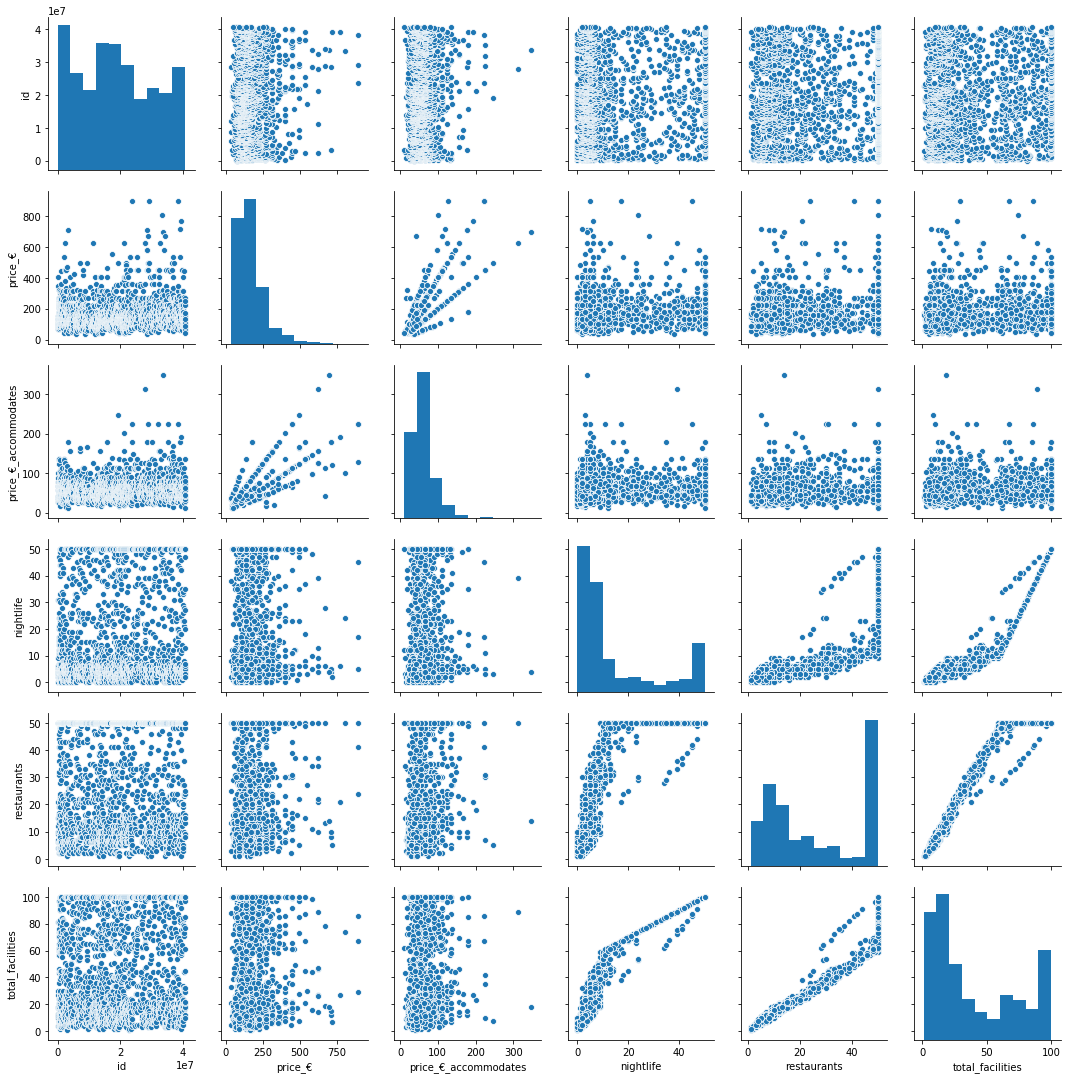

In [45]:
sns.pairplot(Centrum_Oost2)

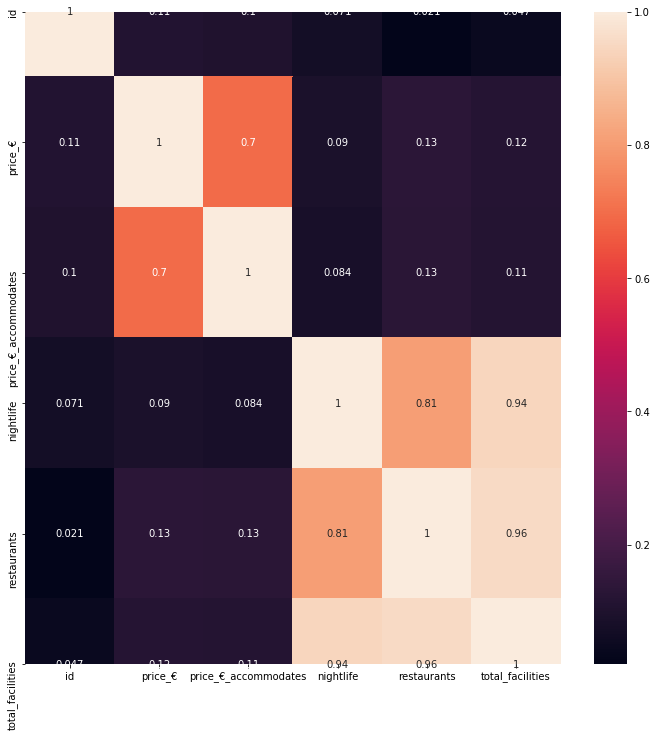

In [46]:
plt.figure(figsize=(12,12))

sns.heatmap(Centrum_Oost2.corr(), annot=True)

# Deep dive neighbourhood: Zuid

In [22]:
Zuid = data_final[(data_final['neighbourhood']=='Zuid')]
Zuid

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
6,31080,Zuid,52.35132,4.84838,Entire home/apt,219,4,196.151073,49.037768
10,43980,Zuid,52.35746,4.86124,Entire home/apt,100,2,89.566700,44.783350
27,55868,Zuid,52.35613,4.88515,Entire home/apt,149,4,133.454383,33.363596
38,73208,Zuid,52.35935,4.87672,Entire home/apt,220,4,197.046740,49.261685
58,137901,Zuid,52.34751,4.84963,Entire home/apt,193,3,172.863731,57.621244
...,...,...,...,...,...,...,...,...,...
19905,40523044,Zuid,52.35084,4.85849,Entire home/apt,195,4,174.655065,43.663766
19940,40559430,Zuid,52.34044,4.84840,Entire home/apt,250,4,223.916750,55.979188
19947,40573440,Zuid,52.34327,4.85907,Entire home/apt,200,4,179.133400,44.783350
19949,40574534,Zuid,52.35255,4.84719,Entire home/apt,250,4,223.916750,55.979188


In [24]:
api_key='ySII53yNdAUpNP8Q3hWylvzfKA4k3_TmaCpebdvzDl3l9yYW2CnXotKQMzbLHavNWPeLtxgm_h36p2fMlIlB7ZZha3VhWa6EG8Ldh3nmZ2IxI-00hpPfGKv13d9gXnYx'
headers = {'Authorization': 'Bearer %s' % api_key}

url='https://api.yelp.com/v3/businesses/search'

def get_facilities(category):
    
    Zuid[category] = 0
    
    for i in Zuid.index:

        params = {'categories': category, 'latitude': Zuid['latitude'][i], 'longitude': Zuid['longitude'][i], 'radius': 250, 'limit': 50}
        req=requests.get(url, params=params, headers=headers)

        if format(req.status_code) != '200':
            raise ValueError("Help API response with error")

        parsed = json.loads(req.text)
        businesses = parsed["businesses"]

        total_venues = pd.DataFrame(businesses)
        Zuid[category][i] = len(total_venues)

In [25]:
print("calculating the number of nightlife facilities")
get_facilities('nightlife')

print("calculating the restaurants of restaurants facilities")
get_facilities('restaurants')

calculating the number of nightlife facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


calculating the restaurants of restaurants facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
Zuid

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants
6,31080,Zuid,52.35132,4.84838,Entire home/apt,219,4,196.151073,49.037768,1,19
10,43980,Zuid,52.35746,4.86124,Entire home/apt,100,2,89.566700,44.783350,5,12
27,55868,Zuid,52.35613,4.88515,Entire home/apt,149,4,133.454383,33.363596,7,20
38,73208,Zuid,52.35935,4.87672,Entire home/apt,220,4,197.046740,49.261685,4,19
58,137901,Zuid,52.34751,4.84963,Entire home/apt,193,3,172.863731,57.621244,0,11
...,...,...,...,...,...,...,...,...,...,...,...
19905,40523044,Zuid,52.35084,4.85849,Entire home/apt,195,4,174.655065,43.663766,3,12
19940,40559430,Zuid,52.34044,4.84840,Entire home/apt,250,4,223.916750,55.979188,0,0
19947,40573440,Zuid,52.34327,4.85907,Entire home/apt,200,4,179.133400,44.783350,4,12
19949,40574534,Zuid,52.35255,4.84719,Entire home/apt,250,4,223.916750,55.979188,1,11


In [27]:
Zuid['total_facilities'] = Zuid['nightlife']+Zuid['restaurants']
Zuid

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
6,31080,Zuid,52.35132,4.84838,Entire home/apt,219,4,196.151073,49.037768,1,19,20
10,43980,Zuid,52.35746,4.86124,Entire home/apt,100,2,89.566700,44.783350,5,12,17
27,55868,Zuid,52.35613,4.88515,Entire home/apt,149,4,133.454383,33.363596,7,20,27
38,73208,Zuid,52.35935,4.87672,Entire home/apt,220,4,197.046740,49.261685,4,19,23
58,137901,Zuid,52.34751,4.84963,Entire home/apt,193,3,172.863731,57.621244,0,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...
19905,40523044,Zuid,52.35084,4.85849,Entire home/apt,195,4,174.655065,43.663766,3,12,15
19940,40559430,Zuid,52.34044,4.84840,Entire home/apt,250,4,223.916750,55.979188,0,0,0
19947,40573440,Zuid,52.34327,4.85907,Entire home/apt,200,4,179.133400,44.783350,4,12,16
19949,40574534,Zuid,52.35255,4.84719,Entire home/apt,250,4,223.916750,55.979188,1,11,12


In [31]:
# creating a new dataframe with the relevant columns

Zuid2 = Zuid[['id', 'room_type', 'price_€', 'price_€_accommodates', 'nightlife', 'restaurants', 'total_facilities']]
Zuid2

,id,room_type,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
6,31080,Entire home/apt,196.151073,49.037768,1,19,20
10,43980,Entire home/apt,89.566700,44.783350,5,12,17
27,55868,Entire home/apt,133.454383,33.363596,7,20,27
38,73208,Entire home/apt,197.046740,49.261685,4,19,23
58,137901,Entire home/apt,172.863731,57.621244,0,11,11
...,...,...,...,...,...,...,...
19905,40523044,Entire home/apt,174.655065,43.663766,3,12,15
19940,40559430,Entire home/apt,223.916750,55.979188,0,0,0
19947,40573440,Entire home/apt,179.133400,44.783350,4,12,16
19949,40574534,Entire home/apt,223.916750,55.979188,1,11,12


In [32]:
stats = Zuid2.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,1397.0,1.804728e+07,1.119598e+07,31080.000000,8.750833e+06,1.717460e+07,2.648960e+07,4.064801e+07,1.773877e+07
price_€,1397.0,1.603532e+02,1.120461e+02,30.452678,8.956670e+01,1.298717e+02,1.791334e+02,8.956670e+02,8.956670e+01
price_€_accommodates,1397.0,5.668911e+01,4.903820e+01,13.882839,3.918543e+01,4.926168e+01,6.672719e+01,8.956670e+02,2.754176e+01
nightlife,1397.0,3.050823e+00,5.032231e+00,0.000000,0.000000e+00,1.000000e+00,4.000000e+00,5.000000e+01,4.000000e+00
restaurants,1397.0,1.421117e+01,1.013571e+01,0.000000,7.000000e+00,1.200000e+01,1.800000e+01,5.000000e+01,1.100000e+01
total_facilities,1397.0,1.726199e+01,1.424887e+01,0.000000,7.000000e+00,1.500000e+01,2.000000e+01,1.000000e+02,1.300000e+01


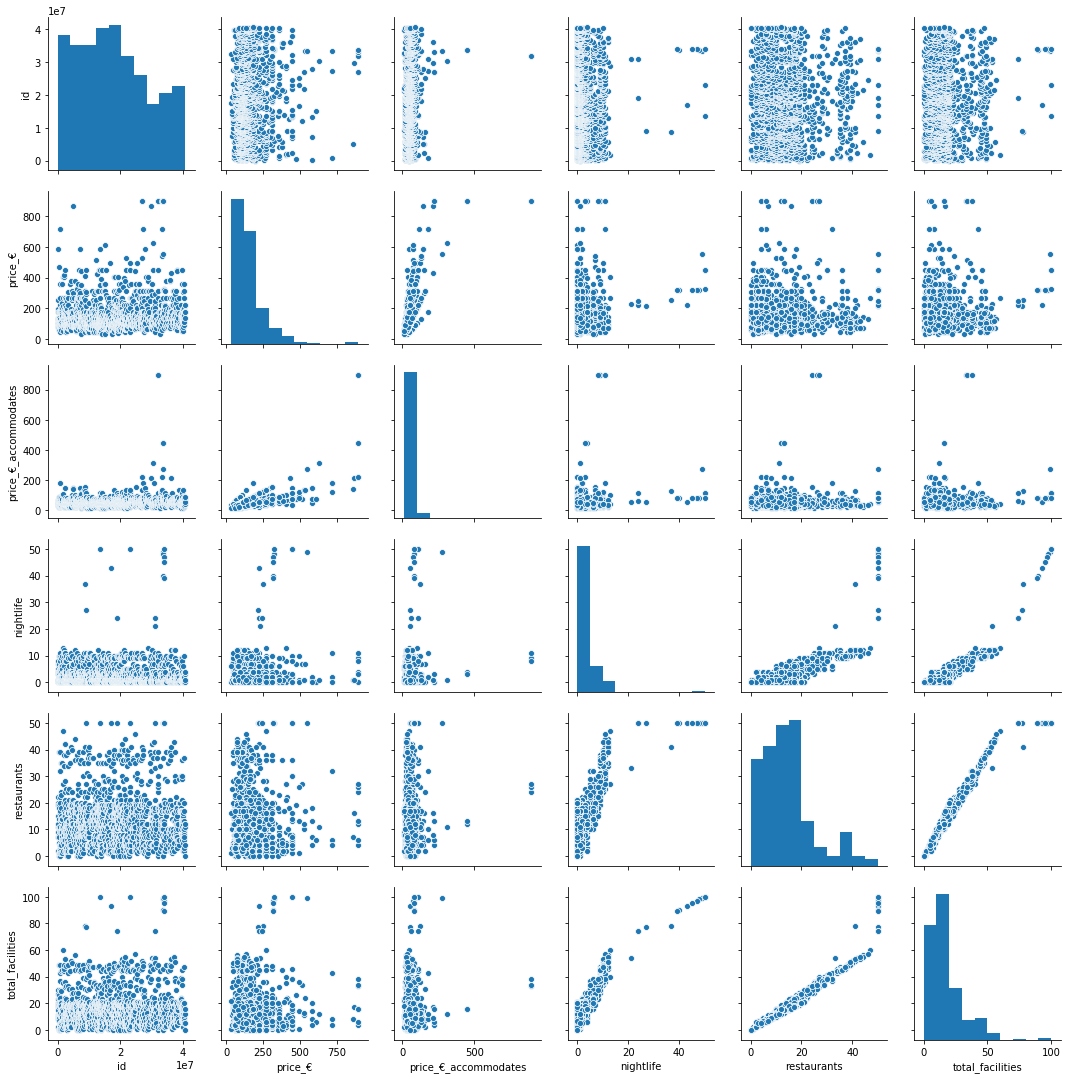

In [33]:
sns.pairplot(Zuid2)

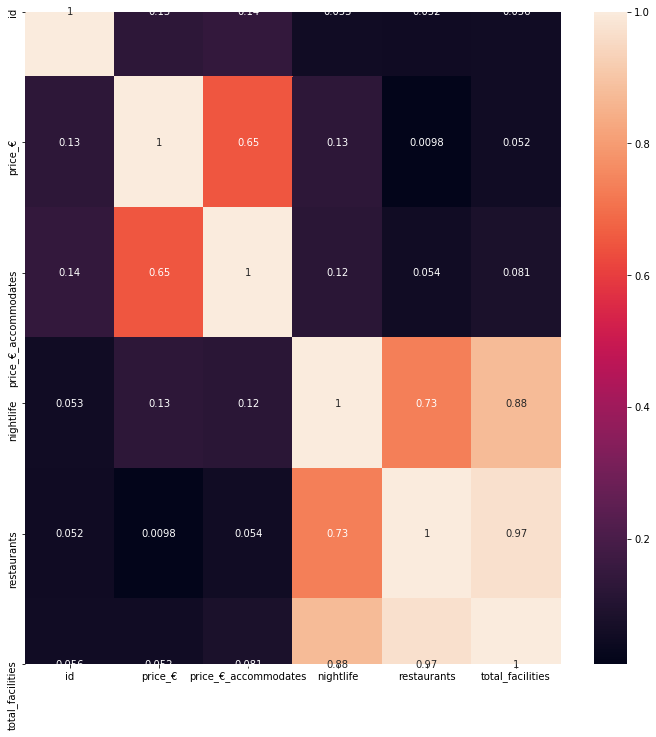

In [34]:
plt.figure(figsize=(12,12))

sns.heatmap(Zuid2.corr(), annot=True)

# Deep dive neighbourhood: Noord-West

In [24]:
Noord_West = data_final[(data_final['neighbourhood']=='Noord-West')]
Noord_West

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
37,70598,Noord-West,52.41433,4.92014,Private room,53,2,47.470351,23.735176
327,667305,Noord-West,52.42037,4.89470,Entire home/apt,140,2,125.393380,62.696690
513,874340,Noord-West,52.42365,4.88702,Private room,77,2,68.966359,34.483179
536,916850,Noord-West,52.40509,4.90317,Entire home/apt,255,4,228.395085,57.098771
576,984134,Noord-West,52.41782,4.90563,Private room,118,4,105.688706,26.422176
...,...,...,...,...,...,...,...,...,...
19700,40194631,Noord-West,52.40194,4.92017,Entire home/apt,150,4,134.350050,33.587513
19768,40341005,Noord-West,52.42452,4.88598,Entire home/apt,125,2,111.958375,55.979188
19772,40343136,Noord-West,52.42332,4.88656,Private room,125,2,111.958375,55.979188
19896,40505775,Noord-West,52.41081,4.92469,Private room,80,2,71.653360,35.826680


In [25]:
api_key='ySII53yNdAUpNP8Q3hWylvzfKA4k3_TmaCpebdvzDl3l9yYW2CnXotKQMzbLHavNWPeLtxgm_h36p2fMlIlB7ZZha3VhWa6EG8Ldh3nmZ2IxI-00hpPfGKv13d9gXnYx'
headers = {'Authorization': 'Bearer %s' % api_key}

url='https://api.yelp.com/v3/businesses/search'

def get_facilities(category):
    
    Noord_West[category] = 0
    
    for i in Noord_West.index:

        params = {'categories': category, 'latitude': Noord_West['latitude'][i], 'longitude': Noord_West['longitude'][i], 'radius': 250, 'limit': 50}
        req=requests.get(url, params=params, headers=headers)

        if format(req.status_code) != '200':
            raise ValueError("Help API response with error")

        parsed = json.loads(req.text)
        businesses = parsed["businesses"]

        total_venues = pd.DataFrame(businesses)
        Noord_West[category][i] = len(total_venues)

In [26]:
print("calculating the number of nightlife facilities")
get_facilities('nightlife')

print("calculating the restaurants of restaurants facilities")
get_facilities('restaurants')

calculating the number of nightlife facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


calculating the restaurants of restaurants facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
Noord_West

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants
37,70598,Noord-West,52.41433,4.92014,Private room,53,2,47.470351,23.735176,0,0
327,667305,Noord-West,52.42037,4.89470,Entire home/apt,140,2,125.393380,62.696690,0,0
513,874340,Noord-West,52.42365,4.88702,Private room,77,2,68.966359,34.483179,0,0
536,916850,Noord-West,52.40509,4.90317,Entire home/apt,255,4,228.395085,57.098771,0,0
576,984134,Noord-West,52.41782,4.90563,Private room,118,4,105.688706,26.422176,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19700,40194631,Noord-West,52.40194,4.92017,Entire home/apt,150,4,134.350050,33.587513,0,0
19768,40341005,Noord-West,52.42452,4.88598,Entire home/apt,125,2,111.958375,55.979188,0,0
19772,40343136,Noord-West,52.42332,4.88656,Private room,125,2,111.958375,55.979188,0,0
19896,40505775,Noord-West,52.41081,4.92469,Private room,80,2,71.653360,35.826680,0,0


In [28]:
Noord_West['total_facilities'] = Noord_West['nightlife']+Noord_West['restaurants']
Noord_West

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
37,70598,Noord-West,52.41433,4.92014,Private room,53,2,47.470351,23.735176,0,0,0
327,667305,Noord-West,52.42037,4.89470,Entire home/apt,140,2,125.393380,62.696690,0,0,0
513,874340,Noord-West,52.42365,4.88702,Private room,77,2,68.966359,34.483179,0,0,0
536,916850,Noord-West,52.40509,4.90317,Entire home/apt,255,4,228.395085,57.098771,0,0,0
576,984134,Noord-West,52.41782,4.90563,Private room,118,4,105.688706,26.422176,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19700,40194631,Noord-West,52.40194,4.92017,Entire home/apt,150,4,134.350050,33.587513,0,0,0
19768,40341005,Noord-West,52.42452,4.88598,Entire home/apt,125,2,111.958375,55.979188,0,0,0
19772,40343136,Noord-West,52.42332,4.88656,Private room,125,2,111.958375,55.979188,0,0,0
19896,40505775,Noord-West,52.41081,4.92469,Private room,80,2,71.653360,35.826680,0,0,0


In [29]:
# creating a new dataframe with the relevant columns

Noord_West2 = Noord_West[['id', 'room_type', 'price_€', 'price_€_accommodates', 'nightlife', 'restaurants', 'total_facilities']]
Noord_West2

,id,room_type,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
37,70598,Private room,47.470351,23.735176,0,0,0
327,667305,Entire home/apt,125.393380,62.696690,0,0,0
513,874340,Private room,68.966359,34.483179,0,0,0
536,916850,Entire home/apt,228.395085,57.098771,0,0,0
576,984134,Private room,105.688706,26.422176,1,0,1
...,...,...,...,...,...,...,...
19700,40194631,Entire home/apt,134.350050,33.587513,0,0,0
19768,40341005,Entire home/apt,111.958375,55.979188,0,0,0
19772,40343136,Private room,111.958375,55.979188,0,0,0
19896,40505775,Private room,71.653360,35.826680,0,0,0


In [30]:
stats = Noord_West2.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,382.0,2.245852e+07,1.135454e+07,70598.000000,1.375915e+07,2.246696e+07,3.316655e+07,4.061519e+07,1.940740e+07
price_€,382.0,1.142468e+02,5.385576e+01,30.452678,7.165336e+01,1.074800e+02,1.388284e+02,4.478335e+02,6.717503e+01
price_€_accommodates,382.0,3.648654e+01,1.430383e+01,11.195838,2.665729e+01,3.358751e+01,4.433552e+01,1.119584e+02,1.767823e+01
nightlife,382.0,4.712042e-02,2.121743e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
restaurants,382.0,1.518325e-01,4.072625e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
total_facilities,382.0,1.989529e-01,4.433219e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00


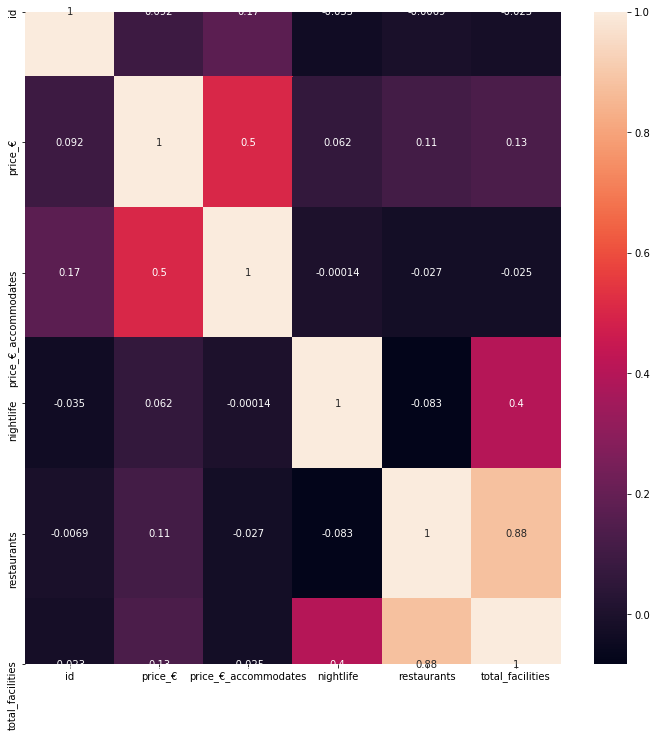

In [31]:
plt.figure(figsize=(12,12))

sns.heatmap(Noord_West2.corr(), annot=True)

# Deep dive neighbourhood: Buitenveldert - Zuidas

In [32]:
Buitenveldert_Zuidas = data_final[(data_final['neighbourhood']=='Buitenveldert - Zuidas')]
Buitenveldert_Zuidas

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates
244,556829,Buitenveldert - Zuidas,52.33580,4.86706,Entire home/apt,124,2,111.062708,55.531354
286,612698,Buitenveldert - Zuidas,52.32653,4.87185,Entire home/apt,180,2,161.220060,80.610030
316,653459,Buitenveldert - Zuidas,52.32253,4.86191,Entire home/apt,170,9,152.263390,16.918154
531,906446,Buitenveldert - Zuidas,52.33072,4.87347,Private room,59,2,52.844353,26.422176
702,1169992,Buitenveldert - Zuidas,52.34264,4.86687,Entire home/apt,120,4,107.480040,26.870010
...,...,...,...,...,...,...,...,...,...
19803,40387731,Buitenveldert - Zuidas,52.31899,4.87604,Entire home/apt,95,2,85.088365,42.544182
19846,40456094,Buitenveldert - Zuidas,52.32369,4.88018,Entire home/apt,200,4,179.133400,44.783350
19864,40469717,Buitenveldert - Zuidas,52.33362,4.85697,Entire home/apt,240,4,214.960080,53.740020
19918,40532805,Buitenveldert - Zuidas,52.32080,4.85962,Entire home/apt,600,6,537.400200,89.566700


In [33]:
api_key='ySII53yNdAUpNP8Q3hWylvzfKA4k3_TmaCpebdvzDl3l9yYW2CnXotKQMzbLHavNWPeLtxgm_h36p2fMlIlB7ZZha3VhWa6EG8Ldh3nmZ2IxI-00hpPfGKv13d9gXnYx'
headers = {'Authorization': 'Bearer %s' % api_key}

url='https://api.yelp.com/v3/businesses/search'

def get_facilities(category):
    
    Buitenveldert_Zuidas[category] = 0
    
    for i in Buitenveldert_Zuidas.index:

        params = {'categories': category, 'latitude': Buitenveldert_Zuidas['latitude'][i], 'longitude': Buitenveldert_Zuidas['longitude'][i], 'radius': 250, 'limit': 50}
        req=requests.get(url, params=params, headers=headers)

        if format(req.status_code) != '200':
            raise ValueError("Help API response with error")

        parsed = json.loads(req.text)
        businesses = parsed["businesses"]

        total_venues = pd.DataFrame(businesses)
        Buitenveldert_Zuidas[category][i] = len(total_venues)

In [34]:
print("calculating the number of nightlife facilities")
get_facilities('nightlife')

print("calculating the restaurants of restaurants facilities")
get_facilities('restaurants')

calculating the number of nightlife facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


calculating the restaurants of restaurants facilities


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
Buitenveldert_Zuidas

,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants
244,556829,Buitenveldert - Zuidas,52.33580,4.86706,Entire home/apt,124,2,111.062708,55.531354,0,1
286,612698,Buitenveldert - Zuidas,52.32653,4.87185,Entire home/apt,180,2,161.220060,80.610030,0,2
316,653459,Buitenveldert - Zuidas,52.32253,4.86191,Entire home/apt,170,9,152.263390,16.918154,0,1
531,906446,Buitenveldert - Zuidas,52.33072,4.87347,Private room,59,2,52.844353,26.422176,0,1
702,1169992,Buitenveldert - Zuidas,52.34264,4.86687,Entire home/apt,120,4,107.480040,26.870010,0,3
...,...,...,...,...,...,...,...,...,...,...,...
19803,40387731,Buitenveldert - Zuidas,52.31899,4.87604,Entire home/apt,95,2,85.088365,42.544182,1,2
19846,40456094,Buitenveldert - Zuidas,52.32369,4.88018,Entire home/apt,200,4,179.133400,44.783350,0,2
19864,40469717,Buitenveldert - Zuidas,52.33362,4.85697,Entire home/apt,240,4,214.960080,53.740020,0,1
19918,40532805,Buitenveldert - Zuidas,52.32080,4.85962,Entire home/apt,600,6,537.400200,89.566700,0,1


In [36]:
Buitenveldert_Zuidas['total_facilities'] = Buitenveldert_Zuidas['nightlife']+Buitenveldert_Zuidas['restaurants']
Buitenveldert_Zuidas

C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,neighbourhood,latitude,longitude,room_type,price_USD,accommodates,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
244,556829,Buitenveldert - Zuidas,52.33580,4.86706,Entire home/apt,124,2,111.062708,55.531354,0,1,1
286,612698,Buitenveldert - Zuidas,52.32653,4.87185,Entire home/apt,180,2,161.220060,80.610030,0,2,2
316,653459,Buitenveldert - Zuidas,52.32253,4.86191,Entire home/apt,170,9,152.263390,16.918154,0,1,1
531,906446,Buitenveldert - Zuidas,52.33072,4.87347,Private room,59,2,52.844353,26.422176,0,1,1
702,1169992,Buitenveldert - Zuidas,52.34264,4.86687,Entire home/apt,120,4,107.480040,26.870010,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
19803,40387731,Buitenveldert - Zuidas,52.31899,4.87604,Entire home/apt,95,2,85.088365,42.544182,1,2,3
19846,40456094,Buitenveldert - Zuidas,52.32369,4.88018,Entire home/apt,200,4,179.133400,44.783350,0,2,2
19864,40469717,Buitenveldert - Zuidas,52.33362,4.85697,Entire home/apt,240,4,214.960080,53.740020,0,1,1
19918,40532805,Buitenveldert - Zuidas,52.32080,4.85962,Entire home/apt,600,6,537.400200,89.566700,0,1,1


In [37]:
Buitenveldert_Zuidas2 = Buitenveldert_Zuidas[['id', 'room_type', 'price_€', 'price_€_accommodates', 'nightlife', 'restaurants', 'total_facilities']]
Buitenveldert_Zuidas2

,id,room_type,price_€,price_€_accommodates,nightlife,restaurants,total_facilities
244,556829,Entire home/apt,111.062708,55.531354,0,1,1
286,612698,Entire home/apt,161.220060,80.610030,0,2,2
316,653459,Entire home/apt,152.263390,16.918154,0,1,1
531,906446,Private room,52.844353,26.422176,0,1,1
702,1169992,Entire home/apt,107.480040,26.870010,0,3,3
...,...,...,...,...,...,...,...
19803,40387731,Entire home/apt,85.088365,42.544182,1,2,3
19846,40456094,Entire home/apt,179.133400,44.783350,0,2,2
19864,40469717,Entire home/apt,214.960080,53.740020,0,1,1
19918,40532805,Entire home/apt,537.400200,89.566700,0,1,1


In [38]:
stats = Buitenveldert_Zuidas2.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,258.0,2.185482e+07,1.103124e+07,556829.000000,1.376085e+07,2.106379e+07,3.020950e+07,4.061730e+07,1.644865e+07
price_€,258.0,1.372627e+02,1.013944e+02,31.348345,7.344469e+01,1.074800e+02,1.612201e+02,7.613170e+02,8.777537e+01
price_€_accommodates,258.0,4.459110e+01,2.344494e+01,10.748004,2.959433e+01,4.030501e+01,5.374002e+01,1.791334e+02,2.414569e+01
nightlife,258.0,3.410853e-01,6.237345e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
restaurants,258.0,4.000000e+00,4.676292e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,2.300000e+01,3.000000e+00
total_facilities,258.0,4.341085e+00,5.089848e+00,0.000000,1.000000e+00,3.000000e+00,5.000000e+00,2.500000e+01,4.000000e+00


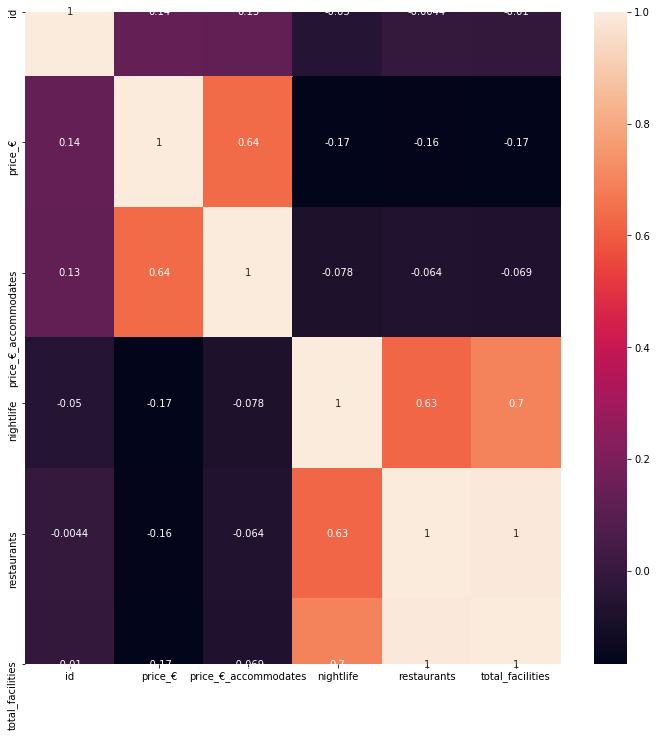

In [39]:
plt.figure(figsize=(12,12))

sns.heatmap(Buitenveldert_Zuidas2.corr(), annot=True)